In [16]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

1. Image Creation and Image Display

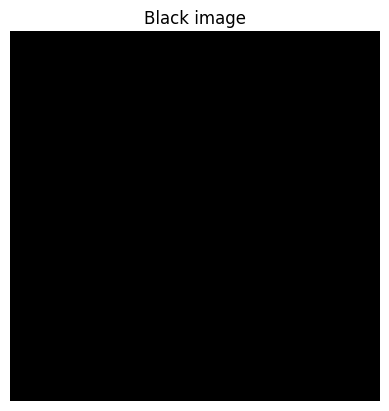

In [18]:
img = np.zeros((400, 400, 3), dtype=np.uint8)
plt.title('Black image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

2. Accessing Image Properties

Shape: (400, 400, 3)
Size: 480000
Channels: 3


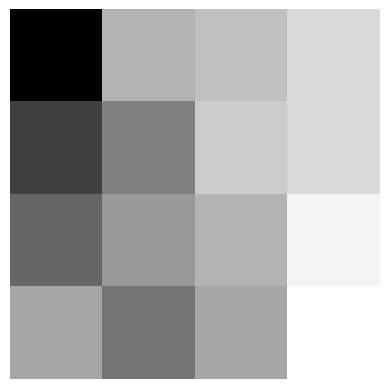

Shape: (4, 4)
Size: 16


In [19]:
print("Shape:", img.shape)  
print("Size:", img.size)  
print("Channels:", img.shape[2])
nd_array= np.array([
    [50, 190, 200, 220,],
    [100, 150, 210, 220,],
    [130, 170, 190, 240,],
    [180, 140, 180, 250,]
], dtype=np.uint8)
plt.imshow(nd_array, cmap='gray')
plt.axis("off")
plt.show()
print("Shape:", nd_array.shape)  
print("Size:", nd_array.size)

3. Color Space Conversion

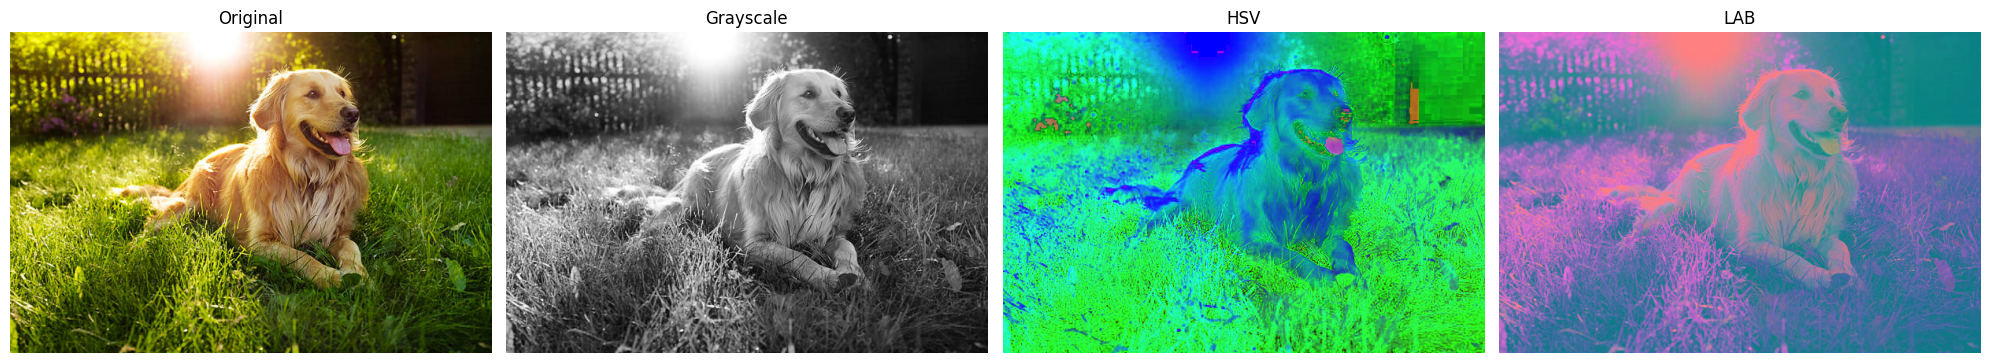

In [22]:
img = cv.imread("img/dog.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

plt.figure(figsize=(20, 20))

plt.subplot(141)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(143)
plt.imshow(hsv)
plt.title('HSV')
plt.axis('off')

plt.subplot(144)
plt.imshow(lab)
plt.title('LAB')
plt.axis('off')

plt.tight_layout()
plt.show()

4. Sampling and Quantization

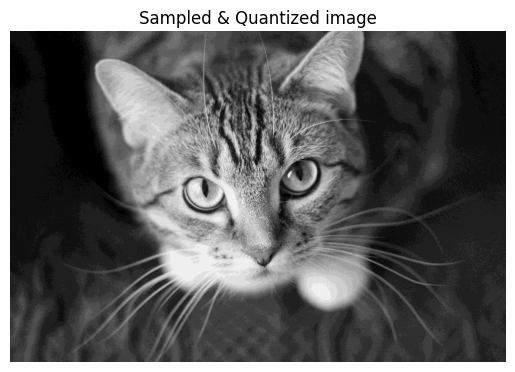

In [92]:
from PIL import Image

def sample_quantize_img(img_path, sampling_factor=2, quantization_levels=8):
    # Load img in grayscale
    img = Image.open(img_path).convert('L')
    img_arr = np.array(img)

    # Downsample the img
    sampled = img_arr[::sampling_factor, ::sampling_factor]

    # Quantize the img
    bin_size = 255 / quantization_levels
    quantized = ((sampled / bin_size).astype(np.uint8)) * bin_size
    quantized = quantized.astype(np.uint8)

    return quantized

# Usage
img_path = "img/cat.jpg"
output = sample_quantize_img(img_path, sampling_factor=4, quantization_levels=16)

# Display
plt.imshow(output, cmap='gray')
plt.title("Sampled & Quantized image")
plt.axis('off')
plt.show()


5. Basic Image Manipulation ( resize, crop, rotate, flip, annotate )

 Resize, Crop, rotate, flipping of image & Annotaion on image: adding rectangle and text on image

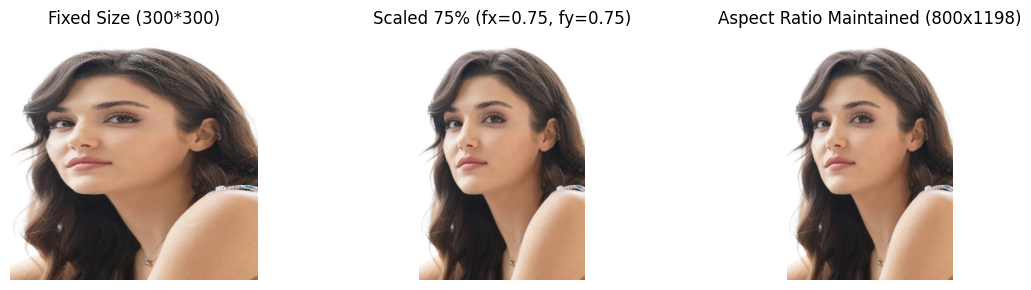

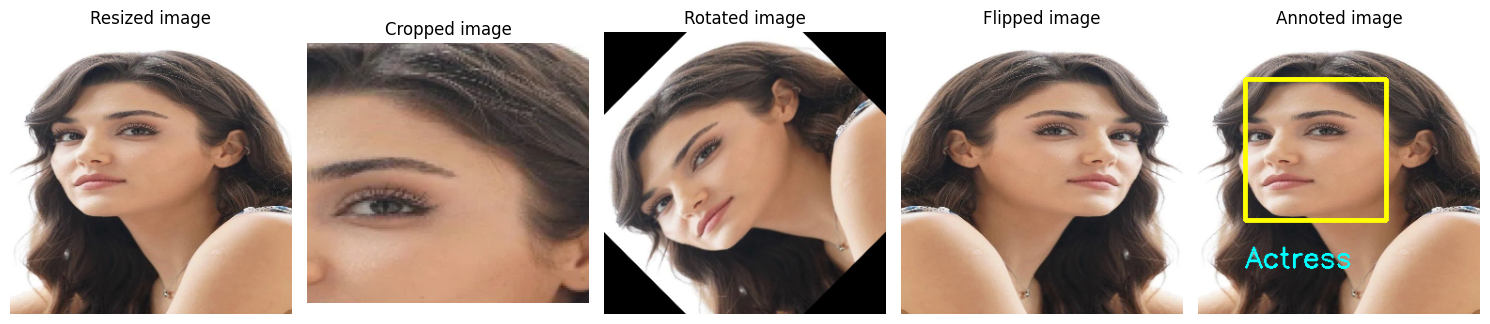

In [34]:
# girl = cv.imread("img/girl.jpg")
girl = cv.cvtColor(cv.imread("img/girl.jpg"), cv.COLOR_BGR2RGB)
fixed = cv.resize(girl, (300, 300))
scaled = cv.resize(girl, None, fx = 0.75, fy = 0.75)

w = 800  
aspratio = girl.shape[0] / girl.shape[1]  # h / w
h = int(w * aspratio)
aspratio = cv.resize(girl, (w, h))

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title("Fixed Size (300*300)")
plt.imshow(fixed)
plt.axis("off")

plt.subplot(132)
plt.title("Scaled 75% (fx=0.75, fy=0.75)")
plt.imshow(scaled)
plt.axis("off")

plt.subplot(133)
plt.title(f"Aspect Ratio Maintained ({w}x{h})")
plt.imshow(aspratio)
plt.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(151)
plt.axis("off")
plt.title('Resized image')
plt.imshow(fixed)

crop = fixed[30:150, 100:230]  # Crop [y1:y2, x1:x2]

(h, w) = fixed.shape[:2]
center = (w // 2, h // 2)
matrix = cv.getRotationMatrix2D(center, 45, 1)
rotate = cv.warpAffine(fixed, matrix, (w, h))

flipped = cv.flip(fixed, 1)  # Flip horizontally, 0 for vertically
plt.subplot(152)
plt.axis("off")
plt.title('Cropped image')
plt.imshow(crop)
plt.subplot(153)
plt.title('Rotated image')
plt.axis("off")
plt.imshow(rotate)
plt.subplot(154)
plt.title('Flipped image')
plt.axis("off")
plt.imshow(flipped)

cv.rectangle(fixed, (50, 50), (200, 200), (255, 255, 0), 3)
output = cv.putText(fixed, "Actress", (50, 250), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
plt.subplot(155)
plt.title('Annoted image')
plt.axis("off")
plt.imshow(output)
plt.tight_layout()
plt.show()

Connetivity: 4-connectivity & 8-connctivity 

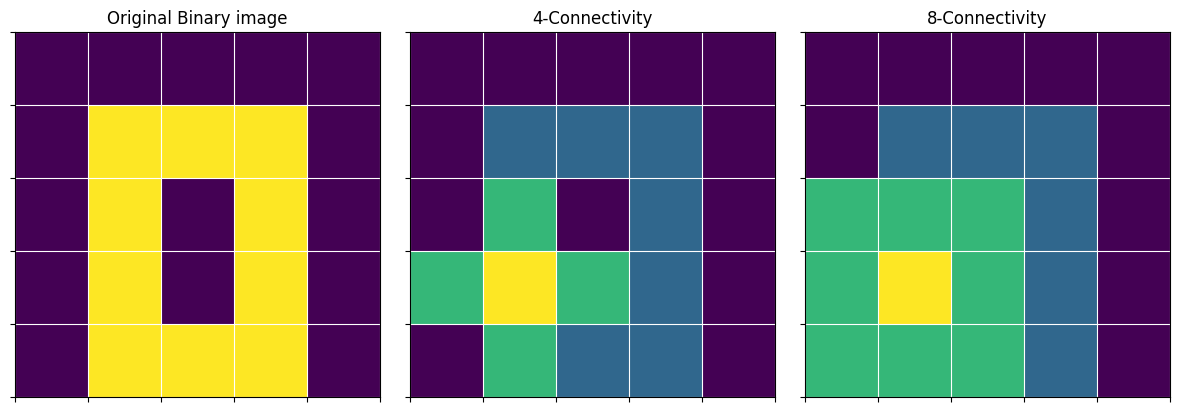

In [ ]:

# Create a new binary pattern (L-shape)
bin_img = np.zeros((5, 5), dtype=np.uint8)
bin_img[1, 1:4] = 1
bin_img[4, 1:4] = 1
bin_img[2:4, 1] = 1
bin_img[2:4, 3] = 1
spixel = (3, 1)  # Pick a pixel in the vertical part of L

# Define neighbor offsets
neighbors_4 = [(-1, 0), (1, 0), (0, -1), (0, 1)]
neighbors_8 = neighbors_4 + [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Function to mark neighbors
def mark_neighbors(base_img, neighbors):
    img = np.copy(base_img)
    for dx, dy in neighbors:
        x, y = spixel[0] + dx, spixel[1] + dy
        if 0 <= x < 5 and 0 <= y < 5:
            img[x, y] = 2
    img[spixel] = 3
    return img

# Generate marked imgs
img_4 = mark_neighbors(bin_img, neighbors_4)
img_8 = mark_neighbors(bin_img, neighbors_8)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['Original Binary image', '4-Connectivity', '8-Connectivity']
imgs = [bin_img, img_4, img_8]

for ax, img, title in zip(axes, imgs, titles):
    ax.imshow(img, cmap='viridis')
    ax.set_title(title)
    ax.set_xticks(np.arange(-0.5, 5, 1))
    ax.set_yticks(np.arange(-0.5, 5, 1))
    ax.grid(True, color='white')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()


Distance Measure: Euclidean Distance, Manhattan Distance (City Block) & Chebyshev Distance

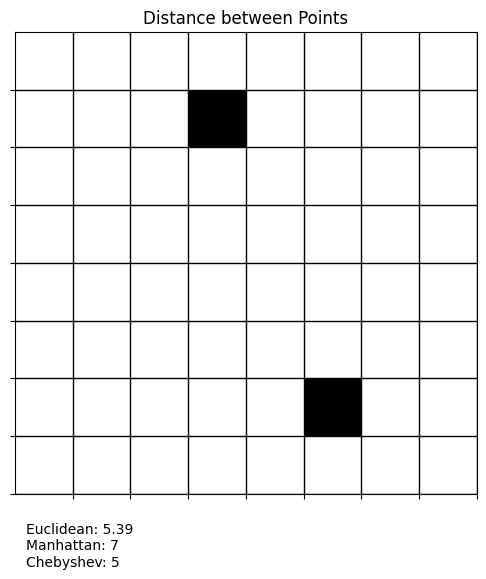

In [80]:
img = np.ones((8,8), dtype=np.uint8)

# Define new points
p1 = (1, 3)
p2 = (6, 5)

# Mark the points as black (0)
img[p1] = 0
img[p2] = 0

# Distance calculations
euclidean_dist = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
manhattan_dist = abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])
chebyshev_dist = max(abs(p2[0] - p1[0]), abs(p2[1] - p1[1]))

# Plot
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Distance between Points')

# Grid
plt.grid(True, color='black', linewidth=1)
plt.xticks(np.arange(0.5, 8, 1), [])
plt.yticks(np.arange(0.5, 8, 1), [])

# Annotation
plt.text(-0.3, 8.75, f'Euclidean: {euclidean_dist:.2f}\nManhattan: {manhattan_dist}\nChebyshev: {chebyshev_dist}')
plt.show()